# <font color='28A745'>System Development for Marketing</font>

### Building a Recommended System for YELP Dataset - David Kakanis - 500783676



# Table of Contents
1. [Introduction](#introduction)
2. [Data Preprocessing](#data-preprocessing)
3. [Exploratory Data Analysis](#exploratory-data-analysis)
4. [Cosine Simirality](#Cosine-simirilarity)
5. [Building KNN](#modeling)
6. [Building SVD](#evaluation)
7. [Conclusion and Recommendations](#conclusion-and-recommendations)


## <b>1<span style='color:#28A745'>|</span> Introduction </b>

The central aim of this project is to investigate the performance variation of recommendation systems, particularly collaborative filtering techniques such as K-Nearest Neighbors (KNN) and Singular Value Decomposition (SVD), across different states for the "Restaurants" category in the Yelp dataset. Our client, Yelp, is a popular online platform that offers user reviews and recommendations for businesses.

An integral part of Yelp's service is its ability to provide highly personalized and relevant restaurant recommendations to its users. To achieve this, Yelp relies on an effective recommendation system that helps users navigate through the large number of restaurants and ensures they find what they are looking for.

The research assumes that the state and its constituiton of the gastronomy offer influences the quality of recommendations systems and might behave different to KNN and SVD. Therefore the following research questions emerge:

**<span style='color:#28A745'>1.1 Main Research question:</span>** </br>

How does the diversity of gastronomy offers in various states affect recommendation systems?

**<span style='color:#28A745'>1.2 Sub Research questions:</span>** </br>

1. How does the diversity in gastronomy offers (in terms of cuisine variety) in different states affect the cosine similarity among restaurants?
3. How effectively can diverse gastronomy offers be recommended using collaborative filtering via KNN in different states?
4. How effectively can diverse gastronomy offers be recommended using collaborative filtering via SVD in different states?
5. How do the recommendation systems perform in states with a high diversity of cuisines compared to those with a lower selection using collaborative filtering via KNN?
6. How do the recommendation systems perform in states with a high diversity of cuisines compared to those with a lower selection using collaborative filtering via SVD?

</br> 

## <b> 2 <span style='color:#28A745'>|</span> Data Preprocessing </b>

### <b> 2.1 <span style='color:#28A745'>|</span> Data Importation</b>

In this section, the necessary libraries and the datasetwill be imported. Data cleaning and preprocessing tasks will also be performing. Sklearn library was used for KNN and Surprise library was used for the SVD.<br>

The following Python libraries that have been imported for data analysis, data visualization and recommender system tasks are explained below.


In [ ]:
# Importing Libraries

# json: For handling JSON data
import json

# pandas: For data manipulation and analysis
import pandas as pd

# numpy: For numerical operations
import numpy as np

# matplotlib.pyplot & seaborn: For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# the following libraries were used for the KNN model
# sklearn.model_selection: For splitting data and parameter tuning
from sklearn.model_selection import train_test_split

# sklearn.metrics: For evaluating model performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer

# sklearn.neighbors: For nearest neighbor algorithms
from sklearn.neighbors import NearestNeighbors

# scipy.sparse: For working with sparse matrices
from scipy.sparse import csr_matrix

# math: For basic math operations
from math import sqrt
import warnings

# the following libraries were used for the KNN model
# surprise: For building recommender systems
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import train_test_split, cross_validate, GridSearchCV

# sklearn.base: Base class for all estimators
from sklearn.base import BaseEstimator


For this project, the initial phase involves importing and preparing data from the Yelp dataset, which is crucial for the development of our recommender system. Here's an overview of the steps taken in the Data Importation phase:

1. **Importing Data**:
   - We start by loading the business and review datasets from Yelp's comprehensive collection. These datasets are pivotal as they contain detailed information about businesses and user reviews.

2. **Data Cleaning**:
   - To ensure data quality, we clean both datasets. This includes removing any null values and duplicates, which are common issues in large datasets. 

3. **Merging Datasets**:
   - The final dataset, which we refer to as the 'fin_df' dataset in our analysis, is constructed by merging the business and review datasets. This merger creates a comprehensive dataset that combines business attributes with user reviews, laying a solid foundation for our recommender system.

After the data importation and initial preprocessing, we conduct an Exploratory Data Analysis (EDA) and further refine the Yelp dataset. This prepares it for the subsequent recommender system tasks. The EDA helps us understand the underlying patterns and characteristics in the data, which is crucial for making informed decisions in later stages of the model-building process. 

In [ ]:
# Load the Yelp Dataset

# Load JSON data
def load_json_data(file_path): #function to load JSON data
    data = [] #create empty list
    with open(file_path, 'r', encoding='utf-8') as file: # open file
        for line in file: #loop through each line
            data.append(json.loads(line)) #append each line to the list
    return data #return the list

# Load Yelp dataset
businesses = load_json_data('/Users/macbook/Library/Mobile Documents/com~apple~CloudDocs/Master DDB/RecSys/Yelp/yelp_df/yelp_academic_dataset_business.json')
reviews = load_json_data('/Users/macbook/Library/Mobile Documents/com~apple~CloudDocs/Master DDB/RecSys/Yelp/yelp_df/yelp_academic_dataset_review.json')
warnings.filterwarnings("ignore", category=UserWarning)

# Create DataFrames
business_df = pd.DataFrame(businesses)
review_df = pd.DataFrame(reviews)

#### Data Storage and Retrieval using Parquet Files
In the pursuit of optimizing memory usage, the DataFrames business_df and review_df are saved to Parquet files. Parquet is a columnar storage file format that is highly optimized for use with big data processing frameworks. It is efficient in both reading and writing data, and it also allows for better compression, which saves storage space.

In [113]:
# Save DataFrame to Parquet file for memory optimization
business_df.to_parquet('/Users/macbook/Library/Mobile Documents/com~apple~CloudDocs/Master DDB/RecSys/Yelp/business_df.parquet')

# Read the filtered_df.parquet file
business_df = pd.read_parquet('/Users/macbook/Library/Mobile Documents/com~apple~CloudDocs/Master DDB/RecSys/Yelp/business_df.parquet')

# Save DataFrame to Parquet file for memory optimization
review_df.to_parquet('/Users/macbook/Library/Mobile Documents/com~apple~CloudDocs/Master DDB/RecSys/Yelp/reviews_df.parquet')

# Read the filtered_df.parquet file
review_df = pd.read_parquet('/Users/macbook/Library/Mobile Documents/com~apple~CloudDocs/Master DDB/RecSys/Yelp/reviews_df.parquet')

In [114]:
review_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
1094389,rJ3CASyRfG-7ZviCBFCJQg,---1lKK3aKOuomHnwAkAow,f19eLfhXqR47Ct8Hz2y_pA,5.0,0,0,0,I hard think luxurious experience begins to de...,2018-12-19 22:26:22
22278,xJuVVh0wspQlCPgTcbbiIg,---2PmXbF47D870stH1jqA,hKameFsaXh9g8WQbv593UA,5.0,0,0,0,No matter what night we go....Service and food...,2014-10-28 14:38:58
5108580,_V8RdGHKQI50WM4CZWkkjA,---2PmXbF47D870stH1jqA,L5LLN0RafiV1Z9cddzvuCw,5.0,6,0,1,Had the opportunity to experience this wonderf...,2014-08-21 04:16:51
1671443,PtiOktOk5COHoNjc6K4gcw,---2PmXbF47D870stH1jqA,eR7ieJD12PUzsYrP8fw6rQ,5.0,0,0,0,Great lunch spot @ Citrus Park Mall. Had the 1...,2012-11-02 00:30:24
2883627,DmRq2WfGMMxy1Lty34rtWg,---2PmXbF47D870stH1jqA,PEjZkL2mNDkiNRqKgZc08w,5.0,3,0,0,The Girls spent a wonderful weekend there. Nex...,2013-07-18 13:41:11


In [115]:
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Shipping Centers, Local Services, Notaries, Ma...","{'Friday': '8:0-18:30', 'Monday': '0:0-0:0', '..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Department Stores, Shopping, Fashion, Home & G...","{'Friday': '8:0-23:0', 'Monday': '8:0-22:0', '..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Friday': '7:0-21:0', 'Monday': '7:0-20:0', '..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Brewpubs, Breweries, Food","{'Friday': '12:0-22:0', 'Monday': None, 'Satur..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Friday': '9:0-0:0', 'Monday': '0:0-0:0', 'Sa..."


In [ ]:
# droping the null values and duplicates
business_df = business_df.dropna()
business_df.drop_duplicates(subset=['business_id'], keep='first', inplace=True)

review_df = review_df.sort_values(by=['user_id'])
review_df.drop_duplicates(subset=['user_id', 'business_id'], keep='first', inplace=True)

In [ ]:
#merging the two dataframes
final_df = pd.merge(business_df, review_df, on='business_id', how='inner')

In [ ]:
# save final_df to parquet file
final_df.to_parquet('/Users/macbook/Library/Mobile Documents/com~apple~CloudDocs/Master DDB/RecSys/Yelp/final_df.parquet')

In [231]:
fin_df = pd.read_parquet('/Users/macbook/Library/Mobile Documents/com~apple~CloudDocs/Master DDB/RecSys/Yelp/final_df.parquet')

In [209]:
# columns of the final dataframe
fin_df.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars_x', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'review_id', 'user_id', 'stars_y',
       'useful', 'funny', 'cool', 'text', 'date'],
      dtype='object')

In [232]:
#fin_df just includes the columns that we need for further analysis and the recommender system
fin_df = fin_df[['user_id', 'business_id', 'stars_y', 'name', 'categories', 'city', 'state', 'review_count' ]]

In [293]:
fin_df.shape

(6229082, 8)

Dropping columns in a dataset, especially in the context of building a recommender system, is an important step in focusing the analysis on the most relevant information and reducing computational complexity. Here's why the specific columns are chosen to be dropped from the Yelp dataset:

1. **Retaining Key Columns for Recommender System**:
   - **'user_id' and 'business_id'**: Essential for identifying unique users and businesses.
   - **'stars_y'**: Represents user ratings, crucial for understanding user preferences.
   - **'name'**: Useful for identifying businesses in the final recommendations.
   - **'categories'**: Helps in categorizing businesses, which can be important for recommendation diversity.
   - **'city' and 'state'**: These geographical indicators can be used for location-based recommendations.
   - **'review_count'**: Indicates the popularity or visibility of a business.

2. **Dropping Less Relevant Columns**:
   - **'address', 'postal_code', 'latitude', 'longitude'**: While useful for geographical mapping, they are less relevant for recommending businesses based on user preferences.
   - **'stars_x'**: This represents business ratings and therefore not relevant for our analysis.
   - **'is_open', 'attributes', 'hours'**: These details, while informative, don't directly contribute to understanding user preferences or predicting ratings.
   - **'review_id'**: Unique identifiers for reviews are not necessary for the recommendation algorithm.
   - **'useful', 'funny', 'cool'**: These are feedback indicators on reviews themselves and don't directly influence the recommendation logic.
   - **'text', 'date'**: The review text and date might be useful for detailed textual analysis or time-series analysis but are not directly needed for a rating-based recommender system.

By focusing on the most pertinent columns, `fin_df` becomes more manageable and relevant for building a recommender system. This selective approach helps in streamlining the analysis, improving processing efficiency, and ensuring that the model is built upon the most impactful features.

In [258]:
#printing the unique users, states, cities and businesses in the datasets
print("Unique users: ", fin_df.user_id.nunique())
print("Unique businesses: ", fin_df.business_id.nunique())
ratings_per_user = fin_df.groupby('user_id').size()
businesses_rated_per_user = fin_df.groupby('user_id')['business_id'].nunique()
ratings_per_business = fin_df.groupby('business_id').size()

# calculating the average number of ratings per user and business
avg_ratings_per_user = ratings_per_user.mean()
avg_ratings_per_business = ratings_per_business.mean()
print(f"Average number of ratings per user: {avg_ratings_per_user}")
print(f"Average number of ratings per business: {avg_ratings_per_business}")

Unique users:  1878672
Unique businesses:  117618
Average number of ratings per user: 3.315683631842067
Average number of ratings per business: 52.960278188712614


In [116]:
fin_df.sample(4)

,user_id,business_id,stars_y,name,categories,city,state,review_count
6005236,TxHaqeZV9kIDv3pXzABVKQ,GuzbBFraIq-fbkjfvaTRvg,5.0,Mesa Verde,"Garage Door Services, Restaurants, Live/Raw Fo...",Santa Barbara,CA,1796
1329979,ZnzpvxOa7eiLESrebeufJQ,pnZQOGEV-Ru6vHIYaUuQBw,4.0,Miss Saigon,"Vietnamese, Bars, Nightlife, Restaurants, Amer...",Tucson,AZ,237
548235,6kGcv1NCeQ7gKp9HMCIYXw,x0hzVPfxWXRIu0yOSEnLCQ,5.0,Duck Donuts,"Coffee & Tea, Donuts, Restaurants, Sandwiches,...",Marlton,NJ,121
5833678,ra8Rcd__1oMXLRDEwt-2xw,zyPz0xvE5XkeCVH2J7g2gw,5.0,Von Elrod's Beer Hall & Kitchen,"Pretzels, Barbeque, American (New), Hot Dogs, ...",Nashville,TN,280


In [117]:
# information about the final_df dataframe like the number of rows, columns, name of columns, etc. 
fin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4237535 entries, 2 to 6229081
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   user_id       object 
 1   business_id   object 
 2   stars_y       float64
 3   name          object 
 4   categories    object 
 5   city          object 
 6   state         object 
 7   review_count  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 291.0+ MB


Converting the object types to category types for optimization of the dataset for analysis.

In [259]:
#convert object types to better types
fin_df['user_id'] = fin_df['user_id'].astype('category')
fin_df['business_id'] = fin_df['business_id'].astype('category')
fin_df['name'] = fin_df['name'].astype('category')
fin_df['categories'] = fin_df['categories'].astype('category')
fin_df['city'] = fin_df['city'].astype('category')
fin_df['state'] = fin_df['state'].astype('category')

# Convert category codes to integers for 'user_id' and 'business_id'
fin_df['user_id'] = fin_df['user_id'].cat.codes
fin_df['business_id'] = fin_df['business_id'].cat.codes


## <b>3 <span style='color:#28A745'>|</span> Exploratory Data Analysis </b>

In this EDA, the Yelp data is explored to gain a deeper understanding and to extract insights that will guide the flow of our analysis and model. The exploration follows this progression:

1. **Data Preprocessing for Restaurants**: Initially, the dataset is filtered to include only entries related to restaurants. This involves selecting categories related to restaurants and removing broader or unrelated categories. Additionally, the 'categories' field is cleaned and prepared for detailed analysis.

2. **Statewise Category Analysis**: For each state, the diversity of restaurant categories is evaluated. This involves computing metrics like the number of unique categories, diversity score (based on the number of categories needed to cover 50% of restaurants), and the percentage of top categories. This helps in understanding the variety and concentration of restaurant types in different states.

3. **Visualizing Category Distributions**: Pie charts are used to visually represent the distribution of restaurant categories in selected states, highlighting the most and least diverse states based on the percentage of top categories.

4. **Analysis of Top States by Number of Businesses**: The states with the highest number of businesses listed are identified and visualized using a bar chart, giving insights into the states with the most significant presence on Yelp.

5. **Rating Distributions in Selected States**: The distribution of star ratings for restaurants in chosen states is analyzed to understand the spread of the ratings.

6. **Review Counts Analysis**: The distribution of review counts is examined.

Through this EDA, we aim to gain valuable insights that will not only inform the development of our recommender system but also address our research questions with a specific focus on the restaurant sector. The visualization of data and the calculated metrics provide a deeper understanding of the patterns and trends within the Yelp dataset, particularly in the context of restaurants. 

Each step of this EDA is crucial for making informed decisions in the later stages of our analysis and for tailoring our recommender system to the specific characteristics of the dataset.

In [120]:
# Filter to include only entries where 'categories' contain the word 'restaurant'
fin_df = fin_df[fin_df['categories'].str.contains('restaurant', case=False, na=False)]

# Clean 'categories' by stripping any leading/trailing spaces and converting to lowercase
fin_df['categories'] = fin_df['categories'].str.strip().str.lower()

# Split 'categories' into separate categories and then explode the DataFrame
# so that each category is in a separate row
fin_df = fin_df.assign(categories=fin_df['categories'].str.split(', ')).explode('categories')

# Defining a list of categories to exclude from the analysis
exclude_categories = ['restaurants', 'bars', 'food', 'breakfast & brunch', 'event planning & services', 
                      'restaurant supplies', 'professional service', 'wholesalers', 'shopping', 
                      'shopping centers', 'appliances', 'home & garden', 'wholesale stores', 
                      'cocktail bars', 'arts & entertainment']

# Filter out reviews that fall into any of the excluded categories
filtered_reviews = fin_df[~fin_df['categories'].str.contains('|'.join(exclude_categories), case=False, na=False)]

# Display DataFrame information (such as columns, data types, and memory usage)
fin_df.info()

# Display the first few rows of the DataFrame to verify the changes
fin_df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16976709 entries, 37 to 6229030
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   user_id       object 
 1   business_id   object 
 2   stars_y       float64
 3   name          object 
 4   categories    object 
 5   city          object 
 6   state         object 
 7   review_count  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 1.1+ GB


,user_id,business_id,stars_y,name,categories,city,state,review_count
37,-6GY04bTPM2Zo4z0GN4a1A,MTSW4McQd7CbVtyjqoe9mw,5.0,St Honore Pastries,restaurants,Philadelphia,PA,80
37,-6GY04bTPM2Zo4z0GN4a1A,MTSW4McQd7CbVtyjqoe9mw,5.0,St Honore Pastries,food,Philadelphia,PA,80
37,-6GY04bTPM2Zo4z0GN4a1A,MTSW4McQd7CbVtyjqoe9mw,5.0,St Honore Pastries,bubble tea,Philadelphia,PA,80
37,-6GY04bTPM2Zo4z0GN4a1A,MTSW4McQd7CbVtyjqoe9mw,5.0,St Honore Pastries,coffee & tea,Philadelphia,PA,80
37,-6GY04bTPM2Zo4z0GN4a1A,MTSW4McQd7CbVtyjqoe9mw,5.0,St Honore Pastries,bakeries,Philadelphia,PA,80


In [121]:
# Identifying unique states
unique_states = filtered_reviews['state'].unique()

# Dictionary to hold various metrics for each state
state_metrics = {}

# Calculating metrics for each state
for state in unique_states:
    # Filter data for the current state
    state_data = filtered_reviews[filtered_reviews['state'] == state]

    # Split and explode the 'categories' column
    state_data_expanded = state_data.assign(categories=state_data['categories'].str.split(',')).explode('categories')

    # Clean the categories and count occurrences
    state_data_expanded['categories'] = state_data_expanded['categories'].str.strip().str.lower()
    category_counts = state_data_expanded['categories'].value_counts()

    # Number of unique categories
    number_of_categories = len(category_counts)

    # Calculating the diversity score (number of categories to exceed 50% of all restaurants)
    cumulative_sum = category_counts.cumsum()
    threshold_50_percent = cumulative_sum.max() * 0.5
    diversity_score = cumulative_sum[cumulative_sum <= threshold_50_percent].size

    # Percentage of the top category
    top_category_percentage = (category_counts.iloc[0] / category_counts.sum()) * 100

    # Calculating the percentage of top 5 categories
    top_5_percentage = category_counts.head(5).sum() / category_counts.sum() * 100

    # Adding the calculated metrics to the dictionary
    state_metrics[state] = {
        "number_of_categories": number_of_categories,
        "diversity_score": diversity_score,
        "top_category_percentage": top_category_percentage,
        "top_5_percentage": top_5_percentage
    }

# Creating a DataFrame from the state metrics dictionary
df_state_metrics = pd.DataFrame.from_dict(state_metrics, orient='index').reset_index()
df_state_metrics.rename(columns={'index': 'state'}, inplace=True)
df_state_metrics_sorted = df_state_metrics.sort_values(by='top_5_percentage', ascending=False)

# Display the sorted DataFrame
df_state_metrics_sorted.head()

,state,number_of_categories,diversity_score,top_category_percentage,top_5_percentage
14,NC,5,2,20.000000,100.000000
15,MT,2,1,50.000000,100.000000
8,LA,288,7,12.186641,40.511470
1,TN,307,10,10.972664,36.848026
6,IL,147,9,11.593674,34.622871


In [122]:
# Extracting top and bottom three states based on 'top_5_percentage'
top_three_states = df_state_metrics_sorted.tail(3)['state'].tolist()  # Most diverse
bottom_three_states = df_state_metrics_sorted.head(3)['state'].tolist()  # Least diverse

# Printing the most and least diverse states
print("Most Diverse States:")
for state in top_three_states:
    print(state)

print("\nLeast Diverse States:")
for state in bottom_three_states:
    print(state)


Most Diverse States:
PA
NV
AB

Least Diverse States:
NC
MT
LA


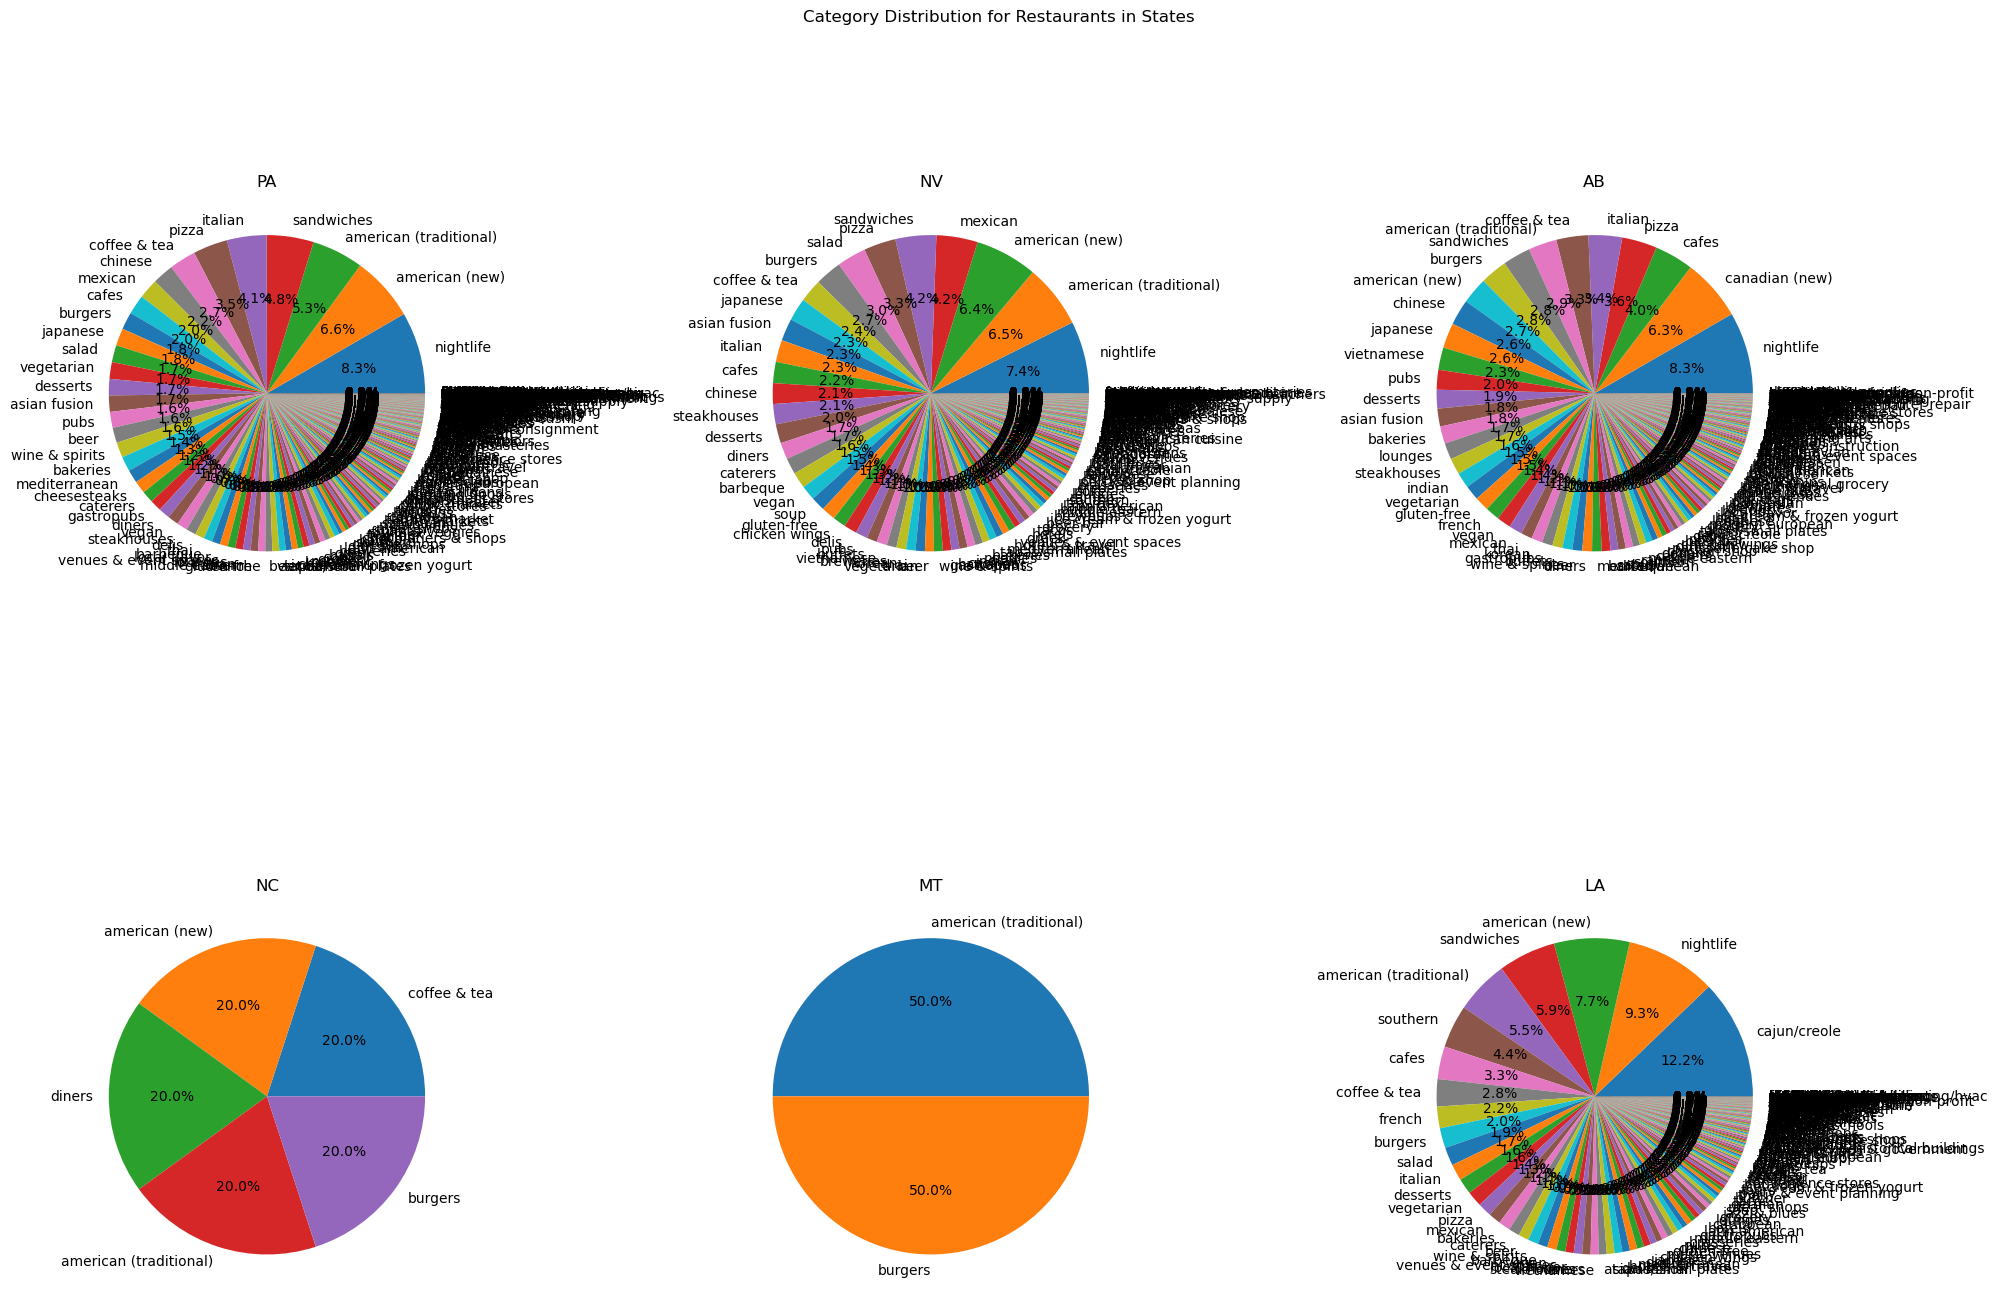

In [124]:
# Number of states
num_states = len(top_three_states) + len(bottom_three_states)

n_rows = 2  # Adjust as needed
n_cols = (num_states + 1) // n_rows

# Create a figure and a set of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))  # Adjust figsize as needed
fig.suptitle('Category Distribution for Restaurants in States')

# Flatten axes array for easy indexing
axes = axes.flatten()

# Loop over each state and plot
for index, state in enumerate(top_three_states + bottom_three_states):
    state_data = filtered_reviews[filtered_reviews['state'] == state]
    state_data_expanded = state_data.assign(categories=state_data['categories'].str.split(',')).explode('categories')
    state_data_expanded['categories'] = state_data_expanded['categories'].str.strip().str.lower()
    category_counts = state_data_expanded['categories'].value_counts()

    # Plotting the pie chart for each state in its respective subplot
    axes[index].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
    axes[index].set_title(f'{state}')

# Hide any unused subplots
for ax in axes[num_states:]:
    ax.axis('off')

# Show the plot
plt.tight_layout()
plt.show()


In the grid we can see the diversity of gastronmoy in the states. The above three states have the highest diversity and the bottom three states have lowest diversity

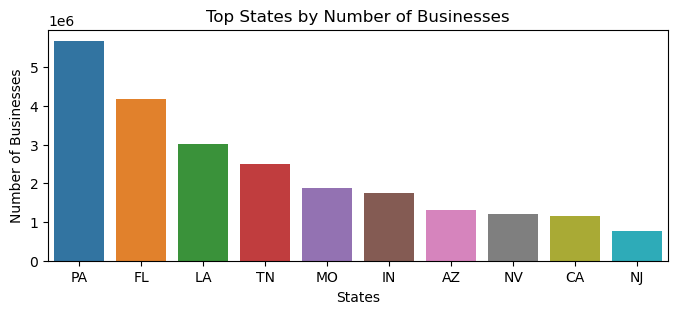

In [16]:
# Top cities by number of businesses
top_states = fin_df['state'].value_counts().head(10)
plt.figure(figsize=(8,3))
sns.barplot(x=top_states.index, y=top_states.values)
plt.title('Top States by Number of Businesses')
plt.xlabel('States')
plt.ylabel('Number of Businesses')
plt.show()

In our research, we aim to conduct a comparative analysis focusing on two specific states from the Yelp dataset: Pennsylvania (PA) and Louisiana (LA). These states have been selected based on their contrasting levels of diversity in business categories, as revealed by our preliminary analysis. Pennsylvania represents the state with the highest diversity (ranked 1st in highest in  diverse states), while Louisiana stands as one of the least diverse (ranked 3rd in least diverse states).

Reasons for the Selection:
1. Contrasting Diversity Levels: By choosing PA and LA, we can explore how the diversity of business categories affects user preferences and behaviors. PA, with its higher diversity, offers a different landscape compared to the less varied and less diverse business environment in LA.

2. Data Comparability: Both states have a reasonable amount of data available, making them suitable candidates for a comparative study.

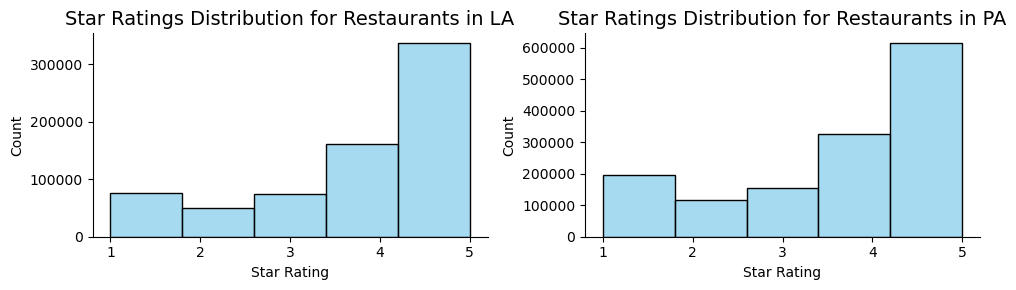

In [223]:
states = ['LA', 'PA']

# Create a figure with 1 row and 2 columns for the plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

for i, state in enumerate(states):
    df_state = fin_df[fin_df['state'] == state]

    # Plot the distribution of star ratings for the current state
    sns.histplot(df_state['stars_y'], bins=5, ax=axes[i], color='skyblue', kde=False)
    axes[i].set_title(f'Star Ratings Distribution for Restaurants in {state}', fontsize=14)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['top'].set_visible(False)
    axes[i].set_xticks(range(1, 6))
    axes[i].set_xlabel('Star Rating')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


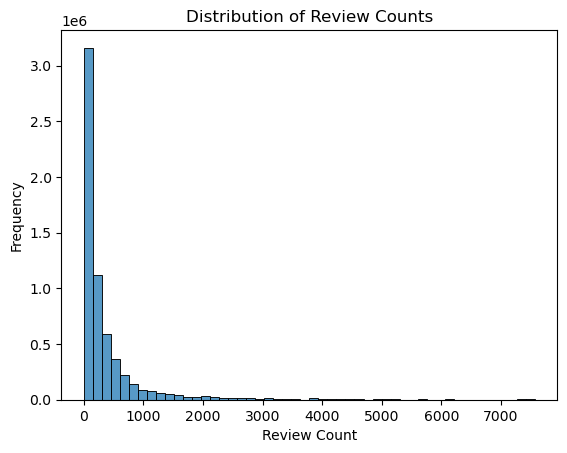

In [30]:
# Distribution of review counts
sns.histplot(fin_df['review_count'], kde=False, bins=50)
plt.title('Distribution of Review Counts')
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.show()

### Gastronomy Diversity Analysis: Comparing Louisiana (LA) and Pennsylvania (PA)

In the analysis, two distinct subsets of data are prepared, each representing different gastronomy environments: Louisiana (LA) for low-diversity gastronomy, and Pennsylvania (PA) for high-diversity gastronomy. Here's how the data is processed for both states:

#### Common Steps for Both States
- **Filtering Data**: Each state's data is filtered to reflect its respective gastronomic diversity. LA data represents a low-diversity environment, while PA data corresponds to a high-diversity setting.
- **Dataset Refinement**: In both subsets, the 'categories' column is removed to simplify the dataset. This step is crucial for focusing the analysis on relevant factors.
- **Data Streamlining** : In each state's subset, 2000 unique users and 2000 businesses are randomly selected. This uniform selection process is crucial for maintaining a manageable dataset size and ensuring comparability between the two states.

#### Objectives of These Steps
- **Ensuring Comparability**: The uniform process applied to both states is designed to ensure comparability. By using a consistent method of data selection and refinement, the analysis can effectively contrast the low-diversity gastronomy environment of LA with the high-diversity setting in PA.
- **Data Focus and Size Management**: The random selection of users and businesses helps to focus the analysis on a manageable dataset, crucial for efficiency and practicality, especially considering computational limits.

Through these steps, the analysis aims to provide insights into how the diversity of gastronomic offerings in LA and PA affects customer preferences and restaurant similarities, as measured by the k-NN model and cosine similarity.


In [294]:
# Filtering DataFrame for high diverse gastronomy
df_high_diverse_gastronomy = fin_df[fin_df['state'] == 'PA']
df_high_diverse_gastronomy = df_high_diverse_gastronomy.drop("categories", axis=1)

# Randomly selecting a subset of user_ids
keep = np.random.choice(df_high_diverse_gastronomy['user_id'].unique(), size=2000, replace=False)
df_high_diverse_gastronomy = df_high_diverse_gastronomy[df_high_diverse_gastronomy['user_id'].isin(keep)]

# Randomly selecting a subset of business_ids
keep2 = np.random.choice(df_high_diverse_gastronomy['business_id'].unique(), size=2000, replace=False)
df_high_diverse_gastronomy = df_high_diverse_gastronomy[df_high_diverse_gastronomy['business_id'].isin(keep2)]

# Filtering DataFrame for low diverse gastronomy
df_low_diverse_gastronomy = fin_df[fin_df['state'] == 'LA']
df_low_diverse_gastronomy = df_low_diverse_gastronomy.drop("categories", axis=1)

# Randomly selecting a subset of user_ids
keep = np.random.choice(df_low_diverse_gastronomy['user_id'].unique(), size=2000, replace=False)
df_low_diverse_gastronomy = df_low_diverse_gastronomy[df_low_diverse_gastronomy['user_id'].isin(keep)]

# Randomly selecting a subset of business_ids
keep2 = np.random.choice(df_low_diverse_gastronomy['business_id'].unique(), size=2000, replace=False)
df_low_diverse_gastronomy = df_low_diverse_gastronomy[df_low_diverse_gastronomy['business_id'].isin(keep2)]

In [295]:
# Shape of the High Diverse dataframe
df_high_diverse_gastronomy.shape

(3006, 7)

In [296]:
# Shape of the Low Diverse dataframe

df_low_diverse_gastronomy.shape

(4892, 7)

## <b>4 <span style='color:#28A745'>|</span> Cosine Similarity </b>

## This part tries to answer subquestion 1: How does the diversity in gastronomy offers (in terms of cuisine variety) in different states affect the cosine similarity among restaurants?


The given code illustrates the use of k-Nearest Neighbors (k-NN) and cosine similarity to analyze the impact of gastronomic diversity (in terms of cuisine variety) on the similarity among restaurants in different states. The process is as follows:

1. **Data Preparation**: The dataset, which presumably contains information about restaurants and their cuisine types across different states, is divided into two subsets based on the level of gastronomic diversity - high and low. This division is based on criteria such as the variety of cuisines offered in the restaurants within each state.

2. **Splitting the Dataset**: Each subset is split into training and testing sets using `train_test_split` from `sklearn.model_selection`. This is essential for evaluating the model's performance later.

3. **Pivot Table Creation**: For the training set of the high gastronomic diversity subset, a pivot table is created with `user_id` as rows, `business_id` (restaurants) as columns, and ratings (`stars_y`) as values. This table is filled with zeros for missing values, indicating unrated restaurants by users.

4. **Sparse Matrix Conversion**: The pivot table is then converted into a sparse matrix using Compressed Sparse Row (CSR) format, which is efficient for storing and processing large sparse matrices.

5. **k-NN Model**: A k-NN model is instantiated with cosine similarity as the distance metric. The model is then fitted on the customer sparse matrix. This step is crucial for finding the nearest neighbors (similar restaurants) based on customer ratings.

6. **Distance Calculation**: The code randomly selects a certain number of query points (users) and computes the average distance of these queries to their nearest neighbors in the sparse matrix. This step aims to quantify how closely related or similar restaurants are in terms of customer preferences.

7. **Statistical Analysis**: The overall average distance and the standard deviation of these distances are calculated. These statistics provide insight into the general level of similarity among restaurants within the high gastronomic diversity group.

8. **Visualization**: Histograms are generated to visualize the distribution of distances for both high and low gastronomic diversity subsets. This visual representation helps in comparing the two groups in terms of restaurant similarity based on customer ratings.

By changing the subset to low gastronomic diversity and repeating the same process, we can compare how the variety in cuisines affects customer similarity among restaurants. 

## High Diverse Gastronomy

In [234]:
from sklearn.model_selection import train_test_split

# Split the dataset subset into training and testing sets
train_high_diverse_gastronomy, test_high_diverse_gastronomy = train_test_split(df_high_diverse_gastronomy, test_size=0.2, random_state=42)

In [235]:
# Transform the training set into a pivot table with customer_id as index, business_id as columns, and rating as values
customer_matrix_high_diverse = train_high_diverse_gastronomy.pivot_table(index='user_id', columns='business_id', values='stars_y').fillna(0)

# Convert the pivot table to a sparse matrix using the Compressed Sparse Row (CSR) format
Train_sparse_matrix_high_diverse = csr_matrix(customer_matrix_high_diverse.values)

In [236]:
# Create an instance of NearestNeighbors with the desired parameters
knn_high_diverse_gastronomy = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10, n_jobs=-1)

# Fit the model on the customer sparse matrix
knn_high_diverse_gastronomy.fit(customer_matrix_high_diverse)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=10)

In [290]:
def compute_knn_distances(matrix, knn_model, num_queries=3000):
    query_indices = np.random.choice(matrix.shape[0], size=num_queries)
    distances = [np.mean(knn_model.kneighbors(matrix.iloc[query_index, :].values.reshape(1, -1))[0]) for query_index in query_indices]

    avg_distance = np.mean(distances)
    std_distance = np.std(distances)

    return avg_distance, std_distance, distances

# Compute the overall average distance, standard deviation, and individual distances for low diverse gastronomy
overall_avg_distance_high_diverse_gastronomy, overall_std_distance_high_diverse_gastronomy, query_distances_high_diverse_gastronomy = compute_knn_distances(customer_matrix_high_diverse, knn_high_diverse_gastronomy)

# Print the overall average distance and standard deviation
print("Overall average distance high_diverse_gastronomy:", overall_avg_distance_high_diverse_gastronomy)
print("\nOverall distance standard deviation high_diverse_gastronomy:", overall_std_distance_high_diverse_gastronomy)


Overall average distance high_diverse_gastronomy: 0.8079557764867477

Overall distance standard deviation high_diverse_gastronomy: 0.14697547735346866


## Low diverse gastronomy

### which is for the state LA in this case

In [238]:
from sklearn.model_selection import train_test_split

# Split the dataset subset into training and testing sets
train_low_diverse_gastronomy, test_low_diverse_gastronomy = train_test_split(df_low_diverse_gastronomy, test_size=0.2, random_state=42)

In [239]:
# Transform the training set into a pivot table with customer_id as index, business_id as columns, and rating as values
customer_matrix_low_diverse = df_low_diverse_gastronomy.pivot_table(index='user_id', columns='business_id', values='stars_y').fillna(0)

# Convert the pivot table to a sparse matrix using the Compressed Sparse Row (CSR) format
Train_sparse_matrix_high_diverse = csr_matrix(customer_matrix_low_diverse.values)

In [240]:
# Create an instance of NearestNeighbors with the desired parameters
knn_low_diverse_gastronomy = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10, n_jobs=-1)

# Fit the model on the customer sparse matrix
knn_low_diverse_gastronomy.fit(customer_matrix_low_diverse)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=10)

In [283]:
def compute_knn_distances(matrix, knn_model, num_queries=3000):
    query_indices = np.random.choice(matrix.shape[0], size=num_queries)
    distances = [np.mean(knn_model.kneighbors(matrix.iloc[query_index, :].values.reshape(1, -1))[0]) for query_index in query_indices]

    avg_distance = np.mean(distances)
    std_distance = np.std(distances)

    return avg_distance, std_distance, distances

# Compute the overall average distance, standard deviation, and individual distances for low diverse gastronomy
overall_avg_distance_low_diverse_gastronomy, overall_std_distance_low_diverse_gastronomy, query_distances_low_diverse_gastronomy = compute_knn_distances(customer_matrix_low_diverse, knn_low_diverse_gastronomy)

# Print the overall average distance and standard deviation
print("Overall average distance low_diverse_gastronomy:", overall_avg_distance_low_diverse_gastronomy)
print("\nOverall distance standard deviation low_diverse_gastronomy:", overall_std_distance_low_diverse_gastronomy)


Overall average distance low_diverse_gastronomy: 0.5916535716870227

Overall distance standard deviation low_diverse_gastronomy: 0.27799970803957114


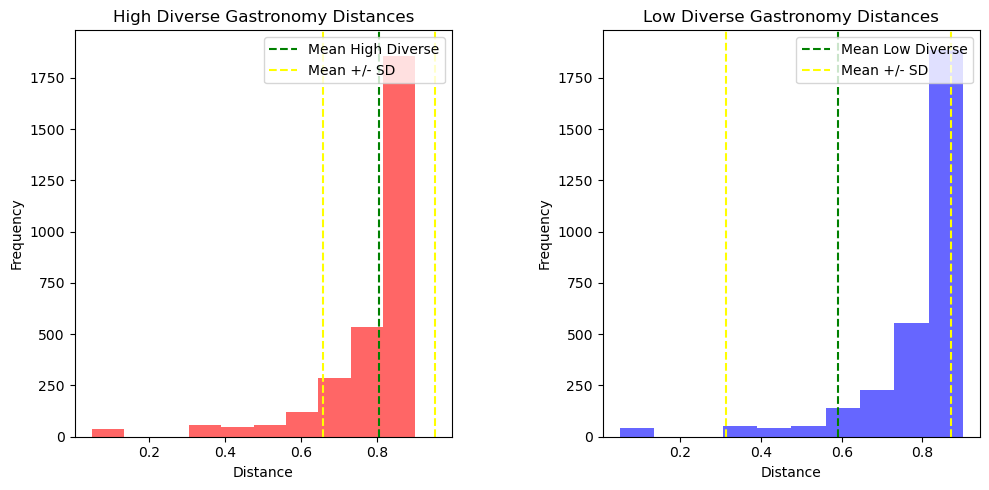

In [289]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Histogram for High diverse gastronomy
axs[0].hist(query_distances_high_diverse_gastronomy, bins=10, color='red', alpha=0.6)
axs[0].axvline(x=overall_avg_distance_high_diverse_gastronomy, color='green', linestyle='--', label='Mean High Diverse')
axs[0].axvline(x=overall_avg_distance_high_diverse_gastronomy + overall_std_distance_high_diverse_gastronomy, color='yellow', linestyle='--', label='Mean +/- SD')
axs[0].axvline(x=overall_avg_distance_high_diverse_gastronomy - overall_std_distance_high_diverse_gastronomy, color='yellow', linestyle='--')
axs[0].set_title('High Diverse Gastronomy Distances')
axs[0].set_xlabel('Distance')
axs[0].set_ylabel('Frequency')
axs[0].legend(loc='upper right')

# Histogram for Low diverse gastronomy
axs[1].hist(query_distances_low_diverse_gastronomy, bins=10, color='blue', alpha=0.6)
axs[1].axvline(x=overall_avg_distance_low_diverse_gastronomy, color='green', linestyle='--', label='Mean Low Diverse')
axs[1].axvline(x=overall_avg_distance_low_diverse_gastronomy + overall_std_distance_low_diverse_gastronomy, color='yellow', linestyle='--', label='Mean +/- SD')
axs[1].axvline(x=overall_avg_distance_low_diverse_gastronomy - overall_std_distance_low_diverse_gastronomy, color='yellow', linestyle='--')
axs[1].set_title('Low Diverse Gastronomy Distances')
axs[1].set_xlabel('Distance')
axs[1].set_ylabel('Frequency')
axs[1].legend(loc='upper right')

# Uniform y-axis scaling
max_freq = max(axs[0].get_ylim()[1], axs[1].get_ylim()[1])
axs[0].set_ylim(0, max_freq)
axs[1].set_ylim(0, max_freq)

# Adjust the layout and display the plot
plt.tight_layout()
plt.subplots_adjust(wspace=0.4)
plt.show()


### Explanation of the histograms
The histograms illustrate a distinct pattern in cosine distances within the subsets of high and low diversity gastronomy businesses. The low-diversity gastronomy subset, represented in blue, shows a concentration of distances closer to zero, indicating a greater similarity between restaurant offerings within this group. In contrast, the high-diversity gastronomy subset, depicted in red, has a broader spread of distances, suggesting a more varied and less similar set of offerings.



## Results: 

Our analysis reveals that the average cosine distance within the high-diversity gastronomy subset is notably bigger compared to that within the low-diversity gastronomy subset. 

This observation suggests that restaurants in the low-diversity gastronomy group tend to be more similar to each other than those in the high-diversity group. 

As a result, this similarity could potentially lead to higher accuracy in our recommender system for the low-diversity gastronomy category. 

In the subsequent phase of our research, we will check this assumption.

## <b>5 <span style='color:#28A745'>|</span> KNN Model Building</b>

#### **Overview of KNN**
K-Nearest Neighbors (KNN) is a versatile algorithm widely used for both classification and regression problems in machine learning. It doesn't make any underlying assumptions about the data distribution and relies on the dataset's actual structure to make predictions. In the context of recommendation systems, KNN is used to predict user preferences based on similarities with other users. The efficiency and accuracy of KNN depend heavily on the choice of 'K' (the number of nearest neighbors) and the distance metric used (like Euclidean, Cosine, or Manhattan). However, it's worth noting that KNN can be computationally intensive, especially with large datasets.

REFERENCE: Batta Mahesh, 2018 - Machine Learning Algorithms - A Review (International Journal of Science and Research (IJSR))

#### **Steps followed in the project**
For this project, I've implemented a KNN-based recommendation system using datasets from Louisiana and Pennsylvania. Our approach focuses on predicting user ratings for businesses based on their similarity to other users. The following steps outline our method:

1. **Hyperparameter Tuning**: 
   - We began by tuning our KNN model's hyperparameters. We manually iterated over a range of hyperparameters to find the optimal combination.
   - The parameters we varied include the number of neighbors (`n_neighbors`), the distance metric (`metric`), and the algorithm type (`algorithm`).

2. **KNN Model Training**: 
   - Our KNN model, instantiated as `NearestNeighbors` from Scikit-learn, is trained on a user-business interaction matrix. This matrix serves as the foundation for understanding user preferences and similarities.

3. **Custom Prediction Function (`predictor`)**: 
   - The `predictor` function encapsulates the core logic of our KNN-based recommendation system. It operates by:
     - Fitting the `NearestNeighbors` model to our user-item matrix.
     - For each user-business pair in the test set, the function finds the closest neighbors and computes their similarities.
     - It then calculates a weighted average rating based on these similarities, where more similar users have a higher influence on the prediction.

4. **Model Evaluation**:
   - We evaluate the model's accuracy using the Root Mean Square Error (RMSE), comparing the predicted ratings against the actual ratings in the test set.

5. **Application Across Different Datasets**:
   - This methodology was applied to both the Louisiana and Pennsylvania datasets, enabling a comparison of user preferences across these regions.

In the upcoming sections, we'll delve deeper into the specifics of our KNN model implementation, particularly focusing on the `predictor` function and the hyperparameter tuning process for both datasets.


In [244]:
from sklearn.metrics import mean_squared_error as mse

In [297]:
def predictor(n_neighbors, metric, algorithm, testset, matrix):
    # Initialize the k-NN model with specified parameters
    knn_model = NearestNeighbors(metric=metric, algorithm=algorithm, n_neighbors=n_neighbors, n_jobs=-1)
    knn_model.fit(matrix)  # Fit the model to the data

    predictions = []
    # Loop through each user-business pair in the test set
    for user_id, business_id in zip(testset['user_id'], testset['business_id']):
        # Check if both user and business are in the matrix
        if user_id in matrix.index and business_id in matrix.columns:
            # Get the index of the user in the matrix
            user_idx = matrix.index.get_loc(user_id)
            # Extract the user's data and reshape for k-NN model
            user_data = matrix.iloc[user_idx, :].values.reshape(1, -1)
            # Find the nearest neighbors for this user
            distances, indices = knn_model.kneighbors(user_data, n_neighbors=n_neighbors)

            # Convert distances to similarities and normalize them
            similarities = 1 / (1 + distances)
            normalized_similarities = similarities / np.sum(similarities)

            # Retrieve the ratings from similar users for the specific business
            sim_users = matrix.index[indices.flatten()]
            sim_ratings = matrix.loc[sim_users, business_id]

            # Compute the weighted average rating using normalized similarities
            weighted_ratings = normalized_similarities.flatten() * sim_ratings
            pred = np.sum(weighted_ratings)
        else:
            # If user or business not found in matrix, prediction is None
            pred = None
        predictions.append(pred)  # Add the prediction to the list

    testset['prediction'] = predictions  # Add predictions to testset
    testset.dropna(inplace=True)  # Remove entries with no predictions

    # Return the Root Mean Square Error between actual and predicted ratings
    return mse(testset['stars_y'], testset['prediction'], squared=False)


## Hyperparameter Tuning

In this project, we conduct hyperparameter tuning for our KNN model, focusing on three key parameters to optimize its performance:

1. **n_neighbors**: We explore different values for the number of nearest neighbors to include in the model. Specifically, we test 5, 10, 15, and 20 neighbors. This parameter is crucial as it determines how many of the closest users (or items) the model considers when making a prediction.

2. **metric**: We evaluate various distance metrics to find the most effective one for our dataset. The metrics under consideration include 'euclidean', 'cosine', and 'manhattan'. The choice of distance metric impacts how the model interprets the similarities between different data points.

3. **algorithm**: The model's efficiency in finding nearest neighbors is tested with different algorithms, namely 'brute' and 'auto'. This parameter influences the computational strategy used to search for nearest neighbors, which can affect the speed and accuracy of the model, especially with large datasets.

Unlike a standard GridSearchCV implementation, our hyperparameter tuning is manually executed by iterating over combinations of these hyperparameters. For each combination, we use a custom function, `predictor`, which integrates the KNN model with our specific user-item interaction matrix. The function:

- Fits the `NearestNeighbors` model using the specified hyperparameters.
- Predicts ratings for each user-business pair in the test set by calculating weighted averages based on the similarities with the nearest neighbors.

The performance of each hyperparameter combination is evaluated using the Root Mean Square Error (RMSE). Our aim is to find the combination that results in the lowest RMSE, indicating the most accurate predictions by our model.

After iterating through all possible combinations, we identify and report the best hyperparameters that minimize the RMSE. This process is applied consistently to both the Pennsylvania and Florida datasets, ensuring a uniform approach to model tuning.

The final step involves using the best hyperparameters to make predictions on our test set and computing the final RMSE to assess the model's effectiveness.

## Low diverse gastronomy

In [245]:
# Define the hyperparameter space
neighbors_options = [5, 10, 15, 20]
metric_options = ['euclidean', 'cosine', 'manhattan']
algorithm_options = ['brute', 'auto']

# Initialize variables to store the best hyperparameters and corresponding RMSE
best_rmse = float('inf')
best_params = {}

# Iterate over all combinations of hyperparameters
for neighbors in neighbors_options:
    for metric in metric_options:
        for algorithm in algorithm_options:
            rmse = predictor(neighbors, metric, algorithm, test_low_diverse_gastronomy, customer_matrix_low_diverse)
            if rmse < best_rmse:
                best_rmse = rmse
                best_params = {'n_neighbors': neighbors, 'metric': metric, 'algorithm': algorithm}

# Print the best hyperparameters
print(f"Best Hyperparameters: {best_params}")


Best Hyperparameters: {'n_neighbors': 5, 'metric': 'manhattan', 'algorithm': 'brute'}


In [246]:
# Use the best hyperparameters to calculate RMSE
final_rmse = predictor(best_params['n_neighbors'], best_params['metric'], best_params['algorithm'], test_low_diverse_gastronomy, customer_matrix_low_diverse)

# Print the final RMSE
print(f"Best RMSE: {final_rmse}")

Best RMSE: 0.7667019107649681


## High diverse gastronomy

In [247]:
# Define the hyperparameter space
neighbors_options = [5, 10, 15, 20]
metric_options = ['euclidean', 'cosine', 'manhattan']
algorithm_options = ['brute', 'auto']

# Initialize variables to store the best hyperparameters and corresponding RMSE
best_rmse = float('inf')
best_params = {}

# Iterate over all combinations of hyperparameters
for neighbors in neighbors_options:
    for metric in metric_options:
        for algorithm in algorithm_options:
            rmse = predictor(neighbors, metric, algorithm, test_high_diverse_gastronomy, customer_matrix_high_diverse)
            if rmse < best_rmse:
                best_rmse = rmse
                best_params = {'n_neighbors': neighbors, 'metric': metric, 'algorithm': algorithm}

# Print the best hyperparameters
print(f"Best Hyperparameters: {best_params}")


Best Hyperparameters: {'n_neighbors': 5, 'metric': 'cosine', 'algorithm': 'brute'}


In [249]:
# Use the best hyperparameters to calculate RMSE
final_rmse = predictor(best_params['n_neighbors'], best_params['metric'], best_params['algorithm'], test_high_diverse_gastronomy, customer_matrix_high_diverse)

# Print the final RMSE
print(f"Best RMSE: {final_rmse}")

Best RMSE: 4.079008258251878


## <b>6 <span style='color:#28A745'>|</span> SVD Model Building </b>


USED SOURCES FOR CODE:

Nicolas Hug  (2015) Using Prediction algorithms [<source code>]. 
https://surprise.readthedocs.io/en/stable/prediction_algorithms.html

George Pipis (19-06-2020) How To Run Recommender Systems In Python[<source code>]. 
https://predictivehacks.com/how-to-run-recommender-systems-in-python/

Nick Becker ( 10 -11 2016) Matrix Factorization for Movie Recommendations in Python[<source code>]. 
https://beckernick.github.io/matrix-factorization-recommender/



### <b>5.1 <span style='color:#28A745'>|</span> SVD </b>

Singular Value Decomposition (SVD) is a powerful matrix factorization technique widely recognized for its applications in recommender systems, as detailed by Koren, Bell, and Volinsky (2009) in their seminal paper on matrix factorization techniques for recommender systems. According to their research, SVD is particularly adept at uncovering latent factors in large and sparse datasets, common in user-item interaction scenarios.

### Implementing SVD in Recommender Systems:

1. **Creating a Ratings Matrix (Matrix 'R')**:
   - For creating a matrix we have to imagine a big table where each row is a user, and each column is an item (like a restaurant). This table is filled with ratings that users have given to these items. If a user hasn't rated an item, that spot in the table is left blank.

2. **Adjusting Ratings (Mean Centering)**:
   - Some users might generally give high ratings, while others might be more conservative with their ratings. To make these ratings more comparable, we adjust them. We do this by subtracting the average rating of each user from their ratings. This way, we focus more on whether they liked or disliked an item relative to their average rating, rather than the absolute rating value.

3. **Breaking Down the Matrix (SVD Factorization)**:
   - SVD splits our big table into three smaller, more manageable tables (matrices called U, S, and VT). 
     - 'U' tells us about the users and their preferences.
     - 'S' is a special table that shows the importance of each feature we find.
     - 'VT' is about the items.

4. **Simplifying the Tables (Dimensionality Reduction)**:
   - The SVD process might give us a lot of features, but not all of them are equally important. We keep only the most important features (top 'k' features). This step is like distilling the essence of our big table into something more concise and easier to work with.

5. **Rebuilding a Similar Ratings Matrix (Matrix Reconstruction)**:
   - Now, we take these simplified tables and multiply them back together. This doesn’t give us exactly the same table we started with, but a close version. This new table can fill in the blanks where we didn’t have ratings before, based on the patterns it learned. 

6. **Making Recommendations (Prediction)**:
   - Using this reconstructed table, we can now predict how much a user might like an item they haven’t rated yet. We do this by looking at their preferences and the characteristics of the item, as described in our smaller tables.

7. **Checking How Good Our System Is (Model Evaluation)**:
   - To make sure our system is working well, we test it. We hide some of the known ratings, try to predict them using our system, and then see how close we are to the actual ratings. We use measures like RMSE (how off our predictions are, on average) or MAE (the average error in our predictions) to evaluate this.

By following these steps, we can build a system that can guess how much a user might like an item, even if they've never rated it before. This process is especially useful for making personalized recommendations in systems like movie or restaurant recommendation apps.

### Conclusion:

As demonstrated in both the study by Koren, Bell, and Volinsky, and the comparative analysis by Chen and Tang, SVD offers a robust framework for approximating user preferences in recommender systems. By capturing latent factors in user-item interactions, SVD facilitates an efficient representation of preferences and enhances the predictive accuracy of collaborative filtering-based recommender systems.

**REFERENCES:**
- Y. Koren, R. Bell, and C. Volinsky. 2009. Matrix Factorization Techniques for Recommender Systems. Computer, 42, 8 (Aug. 2009), 30-37.
- Vito Xituo Chen, Tiffany Y. Tang. Incorporating Singular Value Decomposition in User-based Collaborative Filtering Technique for a Movie Recommendation System: A Comparative Study.


### <b>5.2 <span style='color:#28A745'>|</span> Code Explanation with Hyperparameter Tuning </b>

This code demonstrates the process of constructing a recommender system using the Surprise library, with a particular focus on leveraging Single Value Decomposition (SVD) and hyperparameter tuning.

1. **Initializing the Surprise Reader**:
   - We start by setting up the Surprise reader and specify the rating scale (1 to 5). This step is crucial as it informs the library of the range within which the ratings in our dataset fall.

2. **Loading the Dataset**:
   - The dataset is loaded into the Surprise format using a pandas DataFrame. We select only essential columns (`user_id`, `business_id`, and `stars`) to optimize memory usage and focus on relevant data for our recommendation model.

3. **Hyperparameter Tuning Setup**:
   - **Hyperparameter Grid Definition**: A grid of hyperparameters is defined, including the number of factors (`n_factors`), number of epochs (`n_epochs`), learning rate (`lr_all`), and regularization term (`reg_all`). These parameters are key to optimizing the SVD model.
   - **GridSearchCV Initialization**: We use GridSearchCV from Surprise, specifying SVD as the algorithm and our hyperparameter grid. GridSearchCV will systematically explore different combinations of these parameters.
   - **Cross-Validation for Tuning**: A 3-fold cross-validation is performed during this grid search, which helps in determining the best combination of parameters based on the dataset.

4. **Model Training and Testing**:
   - After identifying the best hyperparameters, we split our dataset into training and testing sets using Surprise's `train_test_split` function, typically with a 75%/25% split. This allows us to train the SVD algorithm on a substantial portion of the data and evaluate its performance on unseen data.

5. **Performing Cross-Validation**:
   - In addition to hyperparameter tuning, we perform a 5-fold cross-validation on the entire dataset using the SVD algorithm. This approach assesses the model's generalizability and robustness by training and testing it on different subsets of the data.

6. **Making Predictions**:
   - With the trained SVD algorithm (using the best hyperparameters), we generate predictions for the test set. The model uses learned latent features from the training data to predict ratings for user-item pairs in the test set.

 7. **Evaluating Model Performance**:
   - The performance of the model is evaluated using metrics like RMSE and MAE. These metrics provide insights into the accuracy of the model’s predictions. A lower RMSE or MAE indicates a model that more accurately captures user preferences.

8. **Outputting Best Parameters and Scores**:
   - Finally, the best parameters and scores from the grid search are outputted. This information is valuable as it tells us which hyperparameter combination yields the most accurate predictions according to RMSE and MAE.

By integrating these steps, we successfully build a recommender system using SVD, enhanced with hyperparameter tuning. This approach ensures that the model is not only tailored to the specific characteristics of the dataset but also optimized for predictive performance.

In [204]:
# Need to import surprise train_test_split again because otherwise it will give an error with the sklearn train_test_split used before
from surprise.model_selection import train_test_split

## Low Diversity Gastronomy

First we'll perform hyperparameter tuning on the low diversity dataset

In [250]:
# Defining the rating scale
reader = Reader(rating_scale=(1, 5))

# Define the hyperparameter grid
param_grid = {'n_factors': [50, 100, 150],
              'n_epochs': [20, 30],
              'lr_all': [0.002, 0.005],
              'reg_all': [0.02, 0.1]}

# Define Grid Search object
gs = GridSearchCV(SVD, param_grid, measures=['RMSE', 'MAE'], cv=3)

# Fit GridSearchCV
data = Dataset.load_from_df(df_low_diverse_gastronomy[['user_id', 'business_id', 'stars_y']], reader)
gs.fit(data)

# Print the best parameters
print("Best parameters: ", gs.best_params)
# Print the best RMSE score
print("Available scores: ", gs.best_score)


Best parameters:  {'rmse': {'n_factors': 50, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.1}, 'mae': {'n_factors': 50, 'n_epochs': 30, 'lr_all': 0.005, 'reg_all': 0.02}}
Available scores:  {'rmse': 1.31957708602402, 'mae': 1.045719237946144}


In [292]:
from surprise.model_selection import train_test_split

# Define the rating scale
reader = Reader(rating_scale=(1, 5))

# Define the algorithm with optimal hyperparameters for RMSE
optimal_params_rmse = {'n_factors': 50, 'n_epochs': 30, 'lr_all': 0.005, 'reg_all': 0.1}
algo = SVD(n_factors=optimal_params_rmse['n_factors'],
           n_epochs=optimal_params_rmse['n_epochs'],
           lr_all=optimal_params_rmse['lr_all'],
           reg_all=optimal_params_rmse['reg_all'])

# --- For Louisiana DataFrame ---
data = Dataset.load_from_df(df_low_diverse_gastronomy[['user_id', 'business_id', 'stars_y']], reader)

# Run 5-fold cross-validation and store the results
results = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=True)

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.25, random_state=42)

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Compute and print RMSE and MAE
print("\nFor Low diversity dataset:")
print("RMSE: ", accuracy.rmse(predictions))
print("MAE: ", accuracy.mae(predictions))

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.3498  1.2711  1.2917  1.3493  1.3383  1.3200  0.0325  
Fit time          0.05    0.04    0.04    0.04    0.04    0.04    0.00    
Test time         0.00    0.00    0.00    0.00    0.01    0.00    0.00    

For Low diversity dataset:
RMSE: 1.3019
RMSE:  1.3019360389503412
MAE:  1.0297
MAE:  1.0296515991919766


## High Diversity Gastronomy

Now we'll perform hyperparameter tuning on the high diversity dataset

In [253]:
# Defining the rating scale
reader = Reader(rating_scale=(1, 5))

# Define the hyperparameter grid
param_grid = {'n_factors': [50, 100, 150],
              'n_epochs': [20, 30],
              'lr_all': [0.002, 0.005],
              'reg_all': [0.02, 0.1]}

# Define Grid Search object
gs = GridSearchCV(SVD, param_grid, measures=['RMSE', 'MAE'], cv=3)

# Fit GridSearchCV
data = Dataset.load_from_df(df_high_diverse_gastronomy[['user_id', 'business_id', 'stars_y']], reader)
gs.fit(data)

# Print the best parameters
print("Best parameters: ", gs.best_params)
# Print the best RMSE score
print("Available scores: ", gs.best_score)


Best parameters:  {'rmse': {'n_factors': 50, 'n_epochs': 30, 'lr_all': 0.005, 'reg_all': 0.02}, 'mae': {'n_factors': 50, 'n_epochs': 30, 'lr_all': 0.005, 'reg_all': 0.02}}
Available scores:  {'rmse': 1.4066996658928257, 'mae': 1.173666522685867}


In [254]:
from surprise.model_selection import train_test_split

# Define the rating scale
reader = Reader(rating_scale=(1, 5))

# Define the algorithm with optimal hyperparameters for RMSE
optimal_params_rmse = {'n_factors': 50, 'n_epochs': 30, 'lr_all': 0.005, 'reg_all': 0.1}
algo = SVD(n_factors=optimal_params_rmse['n_factors'],
           n_epochs=optimal_params_rmse['n_epochs'],
           lr_all=optimal_params_rmse['lr_all'],
           reg_all=optimal_params_rmse['reg_all'])

# --- For Louisiana DataFrame ---
data = Dataset.load_from_df(df_high_diverse_gastronomy[['user_id', 'business_id', 'stars_y']], reader)

# Run 5-fold cross-validation and store the results
results = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=True)

# Split the data into train and test sets for Pennsylvania
trainset, testset = train_test_split(data, test_size=0.25, random_state=42)

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Compute and print RMSE and MAE
print("\nFor High diversity dataset:")
print("RMSE: ", accuracy.rmse(predictions))
print("MAE: ", accuracy.mae(predictions))

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.3446  1.3637  1.4247  1.4270  1.4490  1.4018  0.0403  
Fit time          0.02    0.02    0.02    0.04    0.03    0.03    0.00    
Test time         0.00    0.00    0.00    0.01    0.00    0.00    0.00    

For Pennsylvania dataset:
RMSE: 1.4107
RMSE:  1.4107361464009298
MAE:  1.1795
MAE:  1.179524132156205


### Results for SVD

RMSE Values:

LA Dataset or low diversity dataset: RMSE = 1.3019

PA Dataset or high diviersity dataset: RMSE = 1.4107


The RMSE values indicate the average difference between the predicted and actual ratings. Lower RMSE values suggest better accuracy. In this case, the low diversity dataset has the lowest RMSE, indicating that the SVD algorithm performs relatively better in predicting restaurant ratings.

<b>Overall, the results indicate that the SVD algorithm performs slightly better for the low diversity dataset compared to the high diversity dataset, as evidenced by lower RMSE values. This suggests that there may be variations in user preferences and restaurant characteristics across different states, influencing the effectiveness of the SVD algorithm in predicting ratings.

## <b>6 <span style='color:#28A745'>|</span> Answering research questions</b>

**<span style='color:#28A745'>Main Research question:</span>** </br>

How does the diversity of gastronomy offers in various states affect recommendation systems?


**<span style='color:#28A745'>Sub Research questions:</span>** </br>

1. How does the diversity in gastronomy offers (in terms of cuisine variety) in different states affect the cosine similarity among restaurants?

Our analysis reveals that the average cosine distance within the high-diversity gastronomy subset is notably bigger () compared to that within the low-diversity gastronomy subset. This observation suggests that restaurants in the low-diversity gastronomy group tend to be more similar to each other than those in the high-diversity group. As a result, this similarity could potentially lead to higher accuracy in our recommender system for the low-diversity gastronomy category.


2. How effectively can diverse gastronomy offers be recommended using collaborative filtering via KNN in different states?

  - When evaluating the effectiveness of collaborative filtering via KNN in recommending diverse gastronomy offers in different environments, we observe significant differences in RMSE values between low diversity and high diversity culinary settings:
    - LA dataset (considered as the Low Diversity dataset): The best RMSE achieved in a low diversity setting is 0.7667. An RMSE of 0.7667 means that, on average, the KNN model's predictions are about 0.7667 points away from the actual user ratings. In a 1-5 scale, this error might be seen as moderate. It's not negligible, but it's also not excessively large considering the range of possible ratings.
    - PA dataset (considered as the High Diversity dataset): In contrast, the best RMSE for a high diversity environment is significantly higher at 4.0790. 

3. How effectively can diverse gastronomy offers be recommended using collaborative filtering via SVD in different states?
 
 - When looking at SVD, the RMSE for the LA dataset (considered as a low diversity dataset) is 1.3019, while for the PA dataset (high diversity dataset), it's slightly higher at 1.4107.
    - These values are closer together compared to the RMSEs for KNN, suggesting that SVD provides more consistent performance across different datasets. However, there's still a noticeable difference, with PA showing slightly less accuracy.
    - The reason for this difference could again be attributed to the characteristics of the datasets. High-diversity datasets like PA's might pose more challenges in accurately predicting user preferences due to the complexity and variety of options.

4. How do the recommendation systems perform in states with a high diversity of cuisines compared to those with a lower selection using collaborative filtering via KNN?

The research findings align with the hypothesis that culinary diversity significantly influences the effectiveness of the k-Nearest Neighbors (KNN) recommendation system. The key insights are as follows:

  - Effectiveness in Less Diverse culinary environments: In environments with less diverse culinary offerings, KNN demonstrates higher prediction accuracy. This is evidenced by lower RMSE (Root Mean Square Error) values, indicating that the system's predictions are closer to actual user ratings. The homogeneity in restaurant types and cuisines likely leads to more predictable user preferences, thus enhancing the accuracy of the recommendations
  - Challenges in Highly Diverse culinary environments: Conversely, in environments with a high diversity of culinary options, the KNN system shows decreased effectiveness. The greater variability in restaurant types and cuisines introduces complexity in user preferences, making accurate predictions more challenging. This is reflected in higher RMSE values, suggesting a larger deviation between predicted and actual ratings.
  - Assumptions and implications: Based on these findings, it can be assumed that recommendation systems like KNN are more effective in environments where the culinary landscape is less varied. This has implications for the deployment of such systems, suggesting that they may require adaptation or enhancement to handle the complexities of highly diverse culinary environments effectively.

5. How do the recommendation systems perform in states with a high diversity of cuisines compared to those with a lower selection using collaborative filtering via SVD?

The RMSE for a low diversity dataset (like LA's) is 1.3019, while for a high diversity dataset (such as PA's), it is slightly higher at 1.4107. This variation in RMSE values indicates a difference in the accuracy of the SVD model in these two types of environments.

  - Comparison of RMSE values: The RMSE values for SVD are closer together than those observed for KNN in similar environments. This suggests that SVD, as a recommendation algorithm, provides more consistent performance across datasets with varying levels of culinary diversity.

In summary, both KNN and SVD show varying degrees of effectiveness in different states, influenced by factors such as cuisine diversity and dataset characteristics. KNN exhibits a more pronounced variation in performance, as seen in the significant difference in RMSE values between high and low diversity environments. SVD, while also showing variation, tends to be more stable across different datasets, as indicated by the closer RMSE values for high and low diversity environments.


## Conclusion and recommendation: 

For Low-Diversity culinary environments: KNN might be the more suitable choice due to its higher accuracy in such settings. Its ability to find closely related neighbors works well when in a Low diversity gastronomy.

For High-Diversity culinary environments: SVD is recommended. SVD is preferred not only for its robustness to variety and complexity in user preferences but also for its generally faster performance compared to KNN. This makes it better suited for environments with a wide range of culinary offerings.

Overall suitability: If a recommendation system needs to be versatile and perform reasonably well across various levels of culinary diversity, SVD appears to be the more suitable choice. However, for specific applications in low-diversity environments, KNN could be preferred for its higher accuracy.


